In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [49]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
from utils import misc
import implementations as impl
import cost

In [3]:
error_value = -999.0
seed = 114

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

nb_samples = x.shape[0]
nb_features = x.shape[1]

### Preprocessing

In [5]:
# Cleaned input array by replacing errors with most frequent values
x_clean_mf = pp.clean_data(x, error_value, pp.most_frequent)

# Cleaned input array by replacing errors with mean
x_clean_mean = pp.clean_data(x, error_value, np.mean)

# Cleaned input array by replacing errors with median
x_clean_median = pp.clean_data(x, error_value, np.median)

In [6]:
# Chosen cleaned data
x_clean = x_clean_mf

In [7]:
# Compute tx : column of ones followed by x
first_col = np.ones((nb_samples, 1))
tx = np.concatenate((first_col, x_clean), axis=1)
tx.shape

(250000, 31)

In [8]:
# Normalised version of the data (without the 1's column)
x_normal = pp.normalise(x_clean)
x_normal.shape

(250000, 30)

In [9]:
w_across_impl = {}

In [144]:
# Test for Gradient Descent Least squares.

# Define the parameters of the algorithm.
max_iters = 0
gamma = 10e-7

# Initialization
w_initial = np.ones((31,))

# Debugger
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

# Start gradient descent.
w, loss = impl.least_squares_GD(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=True)

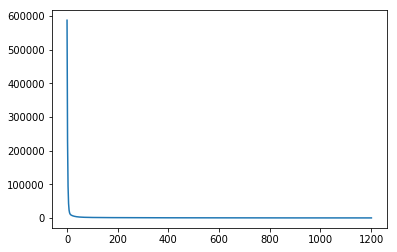

step 1/1202:	loss: 587418.4056723639
step 2/1202:	loss: 364351.59817882336
step 3/1202:	loss: 228100.37990240438
step 4/1202:	loss: 144766.3521358043
step 5/1202:	loss: 93693.96781952406
step 6/1202:	loss: 62296.61586140635
step 7/1202:	loss: 42904.15520303167
step 8/1202:	loss: 30842.11615659731
step 9/1202:	loss: 23261.355463743264
step 10/1202:	loss: 18424.96221129398
step 11/1202:	loss: 15273.766426885979
step 12/1202:	loss: 13161.600214328688
step 13/1202:	loss: 11693.98915084359
step 14/1202:	loss: 10629.863845489272
step 15/1202:	loss: 9821.669817908949
step 16/1202:	loss: 9178.873625464834
step 17/1202:	loss: 8645.724481495163
step 18/1202:	loss: 8187.701900321097
step 19/1202:	loss: 7783.255889912411
step 20/1202:	loss: 7418.772039080889
step 21/1202:	loss: 7085.501670918524
step 22/1202:	loss: 6777.689441538449
step 23/1202:	loss: 6491.430665106114
step 24/1202:	loss: 6223.97337658011
step 25/1202:	loss: 5973.291481525357
step 26/1202:	loss: 5737.823180913692
step 27/1202:	lo

In [145]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('-------------------------')
dbg.print('gamma', last_n=0)
w_across_impl['GD_LS'] = w

In [146]:
# Test for Stochastic Gradient Descent Least squares.

# clear debugger
dbg.clear()

# Define the parameters of the algorithm.
max_iters = 500 # Not put to 0 with SGD
gamma = 10e-7

# Initialization
w_initial = np.ones((31,))

# Start gradient descent.
w, loss = impl.least_squares_SGD(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=False)

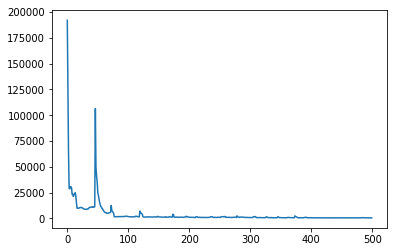

step 1/500:	loss: 191979.2540108687
step 2/500:	loss: 122777.0160770975
step 3/500:	loss: 64596.061441626305
step 4/500:	loss: 29225.509681456995
step 5/500:	loss: 28555.6344396828
step 6/500:	loss: 30711.359281469384
step 7/500:	loss: 30639.046553105094
step 8/500:	loss: 29560.251545559957
step 9/500:	loss: 23174.52546098615
step 10/500:	loss: 23539.79583787688
step 11/500:	loss: 21272.44026199106
step 12/500:	loss: 23008.060732799247
step 13/500:	loss: 23889.431779521525
step 14/500:	loss: 24958.78648819421
step 15/500:	loss: 21456.72318717993
step 16/500:	loss: 15096.07181481813
step 17/500:	loss: 9922.618021501487
step 18/500:	loss: 9836.082076048442
step 19/500:	loss: 9890.050190431128
step 20/500:	loss: 9900.335625362019
step 21/500:	loss: 10371.890582288079
step 22/500:	loss: 10372.672178542529
step 23/500:	loss: 10622.124641593018
step 24/500:	loss: 10658.265362272079
step 25/500:	loss: 10346.84944168264
step 26/500:	loss: 10046.683167625593
step 27/500:	loss: 9651.588812508326

In [147]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('-------------------------')
dbg.print('gamma', last_n=0)
w_across_impl['SGD_LS'] = w

In [148]:
# Test for Least squares with normal equations.
w, loss = impl.least_squares(y, tx)

In [149]:
print('loss:', loss[0])
w_across_impl['NE_LS'] = w

loss: 0.3394990055769035


In [154]:
eps = 10
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    print(impl1, len(w_across_impl[impl1]))
                
print('\nNorm of w:', norm_w)

LR 30
RLR 30
GD_LS 31
SGD_LS 31
NE_LS 31

Norm of w: 5.346268418579422


In [150]:
eps = 10
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between LR and RLR is 1.5854770049680145


ValueError: operands could not be broadcast together with shapes (30,) (31,) 

## Logistic regression test

In [ ]:
np.random.seed(114)

# Random guess 
w = np.random.uniform(0,1,size=nb_features)     
z_ = cost.sigmoid(x_normal @ w)
y_ = misc.get_predictions(z_)

print(misc.accuracy(y, y_))

In [ ]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 300
gamma = 1e-7

# Initialization
nb_features = x_normal.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w'])

w, loss = impl.logistic_regression(y, x_normal, w_initial, max_iters, gamma, debugger=dbg)

In [ ]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['LR'] = w

In [ ]:
y_ = misc.predict(x_normal, w)
print(misc.accuracy(y, y_))

In [ ]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-7
lambda_ = 1e-7

# Initialization
nb_features = x_normal.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w'])

w, loss = impl.reg_logistic_regression(y, x_normal, lambda_, w_initial, max_iters, gamma, debugger=dbg)

In [ ]:
dbg.plot('loss')
dbg.print('loss', last_n=1)
w_across_impl['RLR'] = w

In [ ]:
eps = 10
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)